# Imdb sentiment classification.

Dataset of 25,000 movies reviews from IMDB, labeled by sentiment (positive/negative). Reviews have been preprocessed, and each review is encoded as a sequence of word indexes (integers). For convenience, words are indexed by overall frequency in the dataset, so that for instance the integer "3" encodes the 3rd most frequent word in the data. This allows for quick filtering operations such as: "only consider the top 10,000 most common words, but eliminate the top 20 most common words".

In [80]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import classification_report

import keras
from keras import Sequential, regularizers
from keras.layers import Dense, Dropout, Activation
from keras.datasets import imdb

## 1. Load the dataset.

In [4]:
# Load the data.
(x_train, y_train), (x_test, y_test) = imdb.load_data(num_words=10000)

In [18]:
# Get the word to index dict.
word_to_index = imdb.get_word_index()

# Get the index to word dict.
index_to_word = dict(
[(value, key) for (key, value) in word_to_index.items()])

In [85]:
# Display
print("Length dictionnary = {}".format(len(word_to_index)))

Length dictionnary = 88584


## 2. Handle the dataset.

Here we gather the features of words $X \in \mathbb{R}^{m \times n}$ where $m$ is the total number of samples and $n$ is the features length. For the current example $n$ is equal to $10000$.


In [36]:
def vectorize_sequences(sequences, dimension=10000):
    results = np.zeros((len(sequences), dimension))
    for i, sequence in enumerate(sequences):
        results[i, sequence] = 1.
    return results

In [37]:
# Vectorise the training and test features.
x_tr = vectorize_sequences(x_train)
x_te = vectorize_sequences(x_test)

# Display the size.
print("Size x_tr = {}".format(x_tr.shape))
print("Size x_te = {}".format(x_te.shape))

Size x_tr = (25000, 10000)
Size x_te = (25000, 10000)


In [50]:
# Handle the training and test labels.
y_tr = y_train.reshape(-1, 1)
y_te = y_test.reshape(-1, 1)

# Display the shapes.
print("y_train ", y_tr.shape)
print("y_test ", y_te.shape)

y_train  (25000, 1)
y_test  (25000, 1)


## 3. Build the model.

In [82]:
# Build the model.
model = Sequential()

model.add(Dense(16, kernel_regularizer=regularizers.l2(0.03), input_shape=(10000,)))
model.add(Activation("relu"))
model.add(Dropout(0.5))

model.add(Dense(16, kernel_regularizer=regularizers.l2(0.01)))
model.add(Activation("relu"))
model.add(Dropout(0.5))

model.add(Dense(1))
model.add(Activation("sigmoid"))

# Set the optimizer.
optimizer = keras.optimizers.Adam(lr=0.001, decay=1e-6)

# Compile the model.
model.compile(loss="binary_crossentropy", optimizer=optimizer, metrics=["accuracy"])

# Parameter fitting.
fit_params = {
    "batch_size": 512,
    "epochs": 20,
    "verbose": 1,
    "shuffle": True,
    "validation_data": (x_te, y_te)
}

# Fit the model.
history = model.fit(x_tr, y_tr, **fit_params)

Train on 25000 samples, validate on 25000 samples
Epoch 1/20
25000/25000 [==============================] - 3s 137us/step - loss: 0.9638 - acc: 0.6338 - val_loss: 0.7106 - val_acc: 0.8435
Epoch 2/20
25000/25000 [==============================] - 3s 106us/step - loss: 0.6955 - acc: 0.7705 - val_loss: 0.6151 - val_acc: 0.8632
Epoch 3/20
25000/25000 [==============================] - 3s 106us/step - loss: 0.6331 - acc: 0.8158 - val_loss: 0.5623 - val_acc: 0.8653
Epoch 4/20
25000/25000 [==============================] - 3s 106us/step - loss: 0.5932 - acc: 0.8366 - val_loss: 0.5295 - val_acc: 0.8729
Epoch 5/20
25000/25000 [==============================] - 3s 106us/step - loss: 0.5701 - acc: 0.8414 - val_loss: 0.5138 - val_acc: 0.8707
Epoch 6/20
25000/25000 [==============================] - 3s 106us/step - loss: 0.5531 - acc: 0.8501 - val_loss: 0.5004 - val_acc: 0.8776
Epoch 7/20
25000/25000 [==============================] - 3s 106us/step - loss: 0.5359 - acc: 0.8513 - val_loss: 0.4848 - 

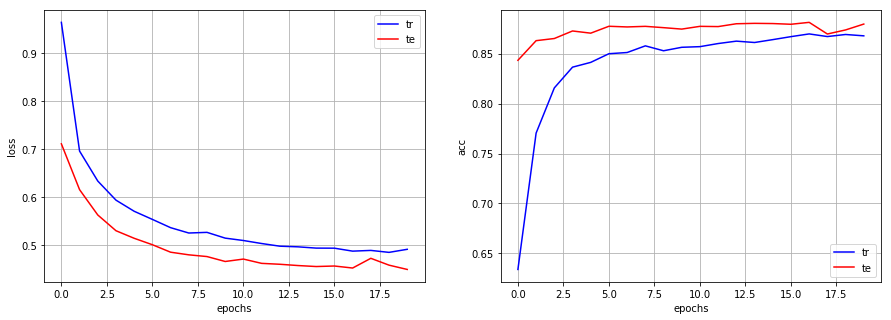

In [83]:
# Visualise the training resuls.
plt.figure(figsize=(15,5))
plt.subplot(121)
plt.plot(history.history["loss"], color="b", label="tr")
plt.plot(history.history["val_loss"], color="r", label="te")
plt.ylabel("loss")
plt.xlabel("epochs")
plt.grid()
plt.legend()
plt.subplot(122)
plt.plot(history.history["acc"], color="b", label="tr")
plt.plot(history.history["val_acc"], color="r", label="te")
plt.ylabel("acc")
plt.xlabel("epochs")
plt.grid()
plt.legend()
plt.show()

## 4. Evaluation

In [84]:
# Get the predictions for the test dataset.
y_pred = model.predict(x_te)

# Update the predictions.
y_pred = 1.0 * (y_pred > 0.5 )

# Display the classification report.
print(classification_report(y_te, y_pred))

             precision    recall  f1-score   support

          0       0.90      0.86      0.88     12500
          1       0.86      0.90      0.88     12500

avg / total       0.88      0.88      0.88     25000

